In [453]:
import numpy as np 

#Q1b)

xi = np.linspace(1,10,50)
epsilon = np.random.normal(0,1,len(xi))
yi = (5*xi) + 15 + epsilon 
print (xi)
print(yi)

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[19.94881109 19.96603548 19.87651876 22.44884787 22.99162436 22.99895251
 25.56129297 24.71568799 26.50881046 28.32719679 29.64645943 29.8525768
 29.87276521 29.81723415 31.60319873 33.96844274 33.56234652 33.71127871
 37.00784624 38.35679769 39.90947602 37.31381408 38.9433939  41.55786473
 42.54422616 42.21828575 43.1032117  44.76434277 47.18170792 47.25004723
 49.30862828 50.24448137 50

sum of squares of residuals: 
43.237884511226255


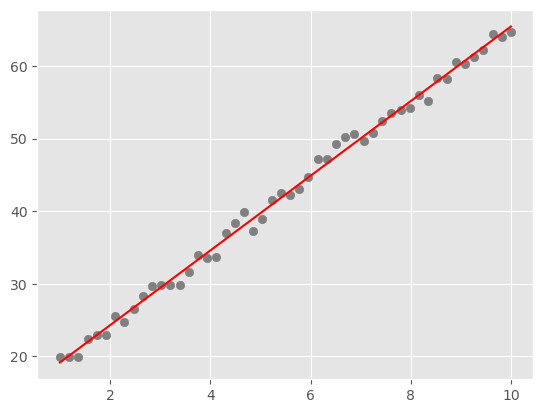

In [454]:
#Q1c)

import matplotlib.pyplot as plt

xMean = np.mean(xi)
yMean = np.mean(yi)

x2sum = np.sum(np.multiply(xi,xi))
xyMean = np.sum(np.multiply(xi,yi))

num = (np.sum(xyMean)) - 50 * np.multiply(xMean,yMean)
denom = (x2sum) - (50 * np.multiply(xMean,xMean))

beta1 = num/denom
beta0 = yMean - (beta1*xMean)

y = (beta1*xi) + beta0

plt.scatter(xi,yi,color='grey')
plt.plot(xi,y,color='red')

mult = np.multiply(yi-y,yi-y)
sumOfSquaresResiduals = np.sum(mult)
print ("sum of squares of residuals: ")
print (sumOfSquaresResiduals)

In [455]:
#Q1d)
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(xi[:,np.newaxis],yi)
xi = xi.reshape(-1,1)
sum = np.sum((regression.predict(xi)-yi)**2)
print (sum)

43.23788451122622


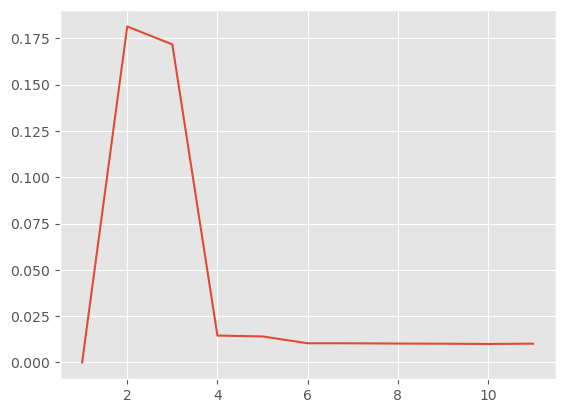

In [456]:
#Q2a)

import pandas as pd
import random
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

x1 = np.linspace(0,1,100)
x2 = np.linspace(0,1,100)

target = np.sin(x1+5*x2)+ np.random.normal(0,0.1,len(x1))
x1 = x1[:,np.newaxis]
x2 = x2[:,np.newaxis]
array = np.hstack((x1,x2))

def linear_regression (X_train,y_train,power):
    poly_features = PolynomialFeatures(degree = power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pipeline.fit(X_train, y_train)
    pred_train = pipeline.predict(X_train)
    train_mse = mean_squared_error(y_train,pred_train)

    return train_mse

for i in range(1,11):
    mse[i]=linear_regression(array,target,i)

ranging = range(1,12,1)
plt.plot(ranging,mse)

(100, 10)
[ 0.          4.30252333  4.30252333 -8.33140105 -8.33140105 -8.33140105
  3.98241066  3.98241066  3.98241066  3.98241066]
(100, 10)
[ 0.          0.96785665  0.96785665 -2.95827469 -2.95827469 -2.95827469
  1.36465924  1.36465924  1.36465924  1.36465924]
(100, 10)
[ 0.         -0.35968303 -0.35968303 -0.59386563 -0.59386563 -0.59386563
  0.14858704  0.14858704  0.14858704  0.14858704]
[0.001, 0.01, 0.1]
[array([ 0.        ,  4.30252333,  4.30252333, -8.33140105, -8.33140105,
       -8.33140105,  3.98241066,  3.98241066,  3.98241066,  3.98241066]), array([ 0.        ,  0.96785665,  0.96785665, -2.95827469, -2.95827469,
       -2.95827469,  1.36465924,  1.36465924,  1.36465924,  1.36465924]), array([ 0.        , -0.35968303, -0.35968303, -0.59386563, -0.59386563,
       -0.59386563,  0.14858704,  0.14858704,  0.14858704,  0.14858704])]


/Users/jennieqclu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/jennieqclu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce 

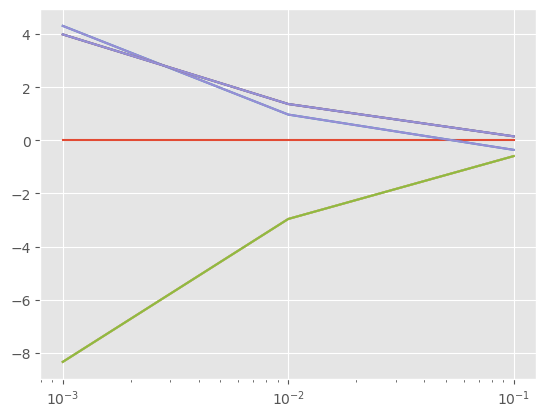

In [457]:
#Q2b)

def ridge_regression(X_train, y_train,_lambda):
    # Use Polynomial features and pipeline to fit data
    X_trainNew =  PolynomialFeatures(degree=3).fit_transform(X_train)
    print(X_trainNew.shape)
    ridge = Ridge(alpha=_lambda, normalize=True)                    
    ridge.fit(X_trainNew,y_train)
    print(ridge.coef_)
    return ridge.coef_


# def ridge_regression(X_train, y_train, _lambda):
#     # Use Polynomial features and pipeline to fit data
#     poly_features = PolynomialFeatures(degree = 3)
#     ridge = Ridge(alpha=_lambda, normalize=True)                    #Note here that we use a ridge regression estimator
#     pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",ridge)])
#     pipeline.fit(X_train, y_train)
    
#     # Get predication with the model trained with pipeline
#     pred_train = pipeline.predict(X_train)
 
#     # MSE and RSS
#     train_mse = mean_squared_error(y_train,pred_train)
#     train_rss = np.sum((y_train - pred_train) ** 2)
    
#     ret = [train_mse, train_rss]
#     ret.extend([pipeline.steps[1][1].intercept_])
#     ret.extend(pipeline.steps[1][1].coef_[1:])
#     return ret

lambda_ridge = [1e-3, 1e-2, 1e-1]

# col = ['train_mse','train_rss'] + ['w%d'%i for i in range(10)]
# ind = ['lambda_%.2g'%lambda_ridge[i] for i in range(0,3)]
# coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)


#Iterate through all powers and assimilate results
result = []
for i in range(len(lambda_ridge)):
    # coef_matrix_ridge.iloc[i,:12] = ridge_regression(array,target, _lambda=lambda_ridge[i])
    result.append(ridge_regression(array,target, _lambda=lambda_ridge[i]))

plt.plot(lambda_ridge,result)
print(lambda_ridge)
print(result)
plt.xscale('log')



The 10 weights would overlap with eachother. As lamba increases to 0.1, the weights would converge closer to 0

(100, 10)
(100, 10)
(100, 10)
[array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.65991981e+00,
       -4.90861846e-14, -3.22390028e-17,  1.84708528e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00]), array([ 0.00000000e+00, -5.33715987e-01, -0.00000000e+00, -1.12365619e+00,
       -1.54747214e-14, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00]), array([ 0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])]


/Users/jennieqclu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/jennieqclu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

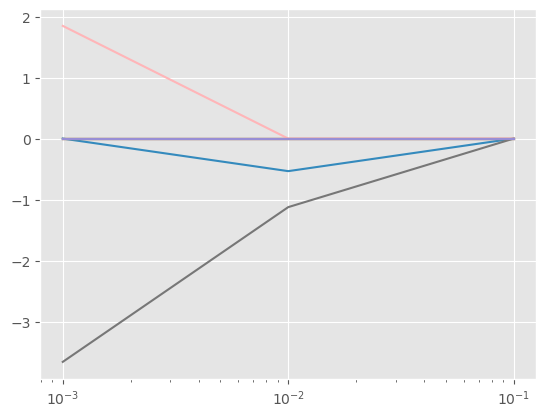

In [458]:
#Q2c)
from sklearn.linear_model import Lasso

def Lasso_regression(X_train, y_train,_Lasso):
    # Use Polynomial features and pipeline to fit data
    X_trainNew =  PolynomialFeatures(degree=3).fit_transform(X_train)
    print(X_trainNew.shape)
    lasso = Lasso(alpha=_Lasso, normalize=True)                    
    lasso.fit(X_trainNew,y_train)
    return lasso.coef_

Lasso_new = [1e-3, 1e-2, 1e-1]


#Iterate through all powers and assimilate results
result = []
for i in range(len(Lasso_new )):
    result.append(Lasso_regression(array,target, _Lasso=Lasso_new [i]))
print(result)
plt.plot(Lasso_new ,result)
plt.xscale('log')


Similar to the Ridge, where as lambda increases to 0.1, the weights would converge to 0 and there's overlapping. However, using Lasso, a few of the weights would have a small dip or already reach 0 at when lambda = 0.01 

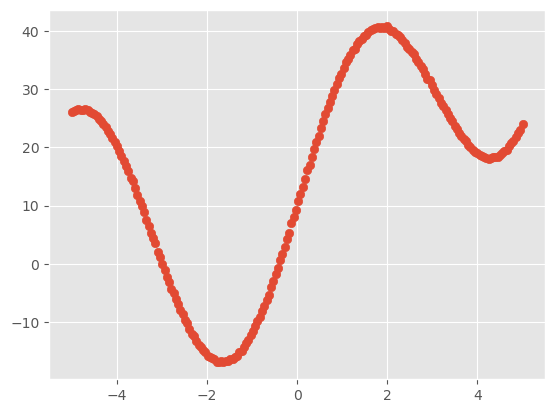

In [459]:
# Q3a)

x = np.linspace(-5,5,200)
y =22*np.sin(x)+(0.6*x**2)+4*x+10+np.random.normal(0,0.1,len(x))
plt.scatter(x,y)

             train_mse test_mse
model_pow_1    2.5e+02  2.8e+02
model_pow_2    2.3e+02  2.7e+02
model_pow_3         62       73
model_pow_4         62       73
model_pow_5        2.6      2.6
model_pow_6        2.6      2.6
model_pow_7      0.036    0.043
model_pow_8      0.036    0.043
model_pow_9     0.0096    0.016
model_pow_10    0.0095    0.016
model_pow_11     0.009    0.016
model_pow_12    0.0086    0.018
model_pow_13    0.0086    0.018
model_pow_14    0.0085    0.018
model_pow_15    0.0085    0.018
model_pow_16    0.0082    0.017
model_pow_17    0.0082    0.017
model_pow_18    0.0079    0.018
model_pow_19     0.008    0.019
model_pow_20    0.0087    0.018


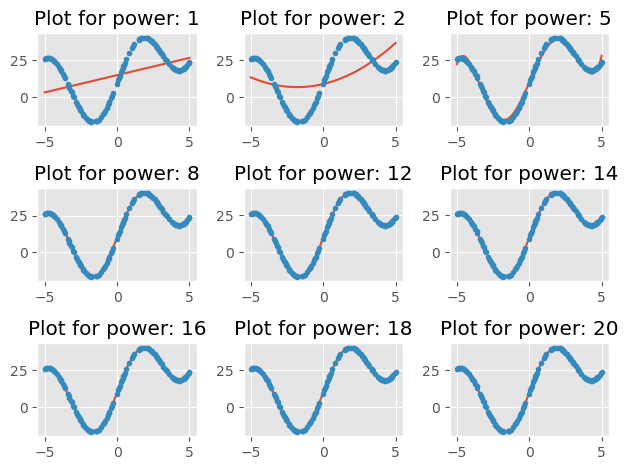

In [460]:
#Q3b)

def linear_regression_Q3(X_train, y_train, X_test, y_test, power, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pipeline.fit(X_train[:,np.newaxis], y_train)
    
    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])
    
    # MSE and RSS
    #Call the mean_squared_error function from sklearn.metrics
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = np.sum((y_train - pred_train) ** 2)
    test_rss = np.sum((y_test - pred_test) ** 2)

    # Plot
    # here models_to_plot is a dictionary containing the power values you want to plot
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('Plot for power: %d'%power)
    
    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

col = ['train_mse','test_mse', 'train_rss','test_rss'] + ['w%d'%i for i in range(21)]
ind = ['model_pow_%d'%i for i in range(1,21)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)


models_to_plot = {1:331,2:332,5:333,8:334,12:335,14:336,16:337,18:338,20:339}

X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size=0.40, random_state=42)

for i in range(1,21):
    coef_matrix_simple.iloc[i-1,0:i+5] = linear_regression_Q3(X_tr, y_tr, X_te, y_te, power=i, models_to_plot=models_to_plot)

# print result matrix 
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_simple[['train_mse','test_mse']])   # We display the train + test RSS columns of our dataframe

From the graph, we could see that 5 would be a good fit. After 8, we could barely see the the red fit line from the scatter plots, indicating that 8+ power could be overfitting (catching the noise in the data)

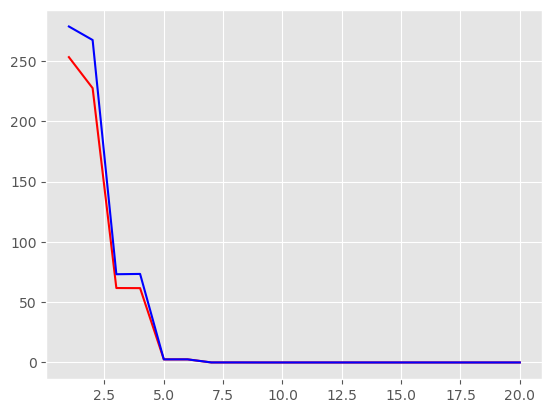

In [461]:
#Q3c)
poly_deg = np.arange(1,21)

# Red = train RSS; Blue = test RSS
plt.plot(poly_deg, coef_matrix_simple['train_mse'], 'r',  poly_deg, coef_matrix_simple['test_mse'], 'b')
plt.show()

Underfitting is when the prediction doesn't capture the trend of the data like in Q3 b) for power 1 and 2.
Overfitting is when the prediction is very strong that it captures the trend of data and also captures the noise.
From this graph, we could see that power=5 would be the best fitting.